In [1]:
pip install nltk

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
data.head(6)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive


In [6]:
positive_review=data[data['sentiment']=='positive']['review'][:1000]
negative_review=data[data['sentiment']=='negative']['review'][:1000]
print('Total number of positive reviews',len(positive_review))
print('Total number of negative reviews',len(negative_review))

Total number of positive reviews 1000
Total number of negative reviews 1000


In [7]:
data.shape

(50000, 2)

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
def textpreprocess(message):
  nochar=[char for char in message if char not in string.punctuation]
  nochar=''.join(nochar)
  nochar=nochar.lower()
  nostop=[word for word in nochar.split() if word.lower() not in stopwords.words('english') and word.isalpha() ]
  return nostop


In [10]:
import string
from nltk.corpus import stopwords
positive_words=textpreprocess(positive_review)

In [11]:
positive_words[:100]

['one',
 'reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'set',
 'right',
 'word',
 'trust',
 'show',
 'faint',
 'hearted',
 'show',
 'pulls',
 'punches',
 'regards',
 'sex',
 'classic',
 'use',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'focuses',
 'mainly',
 'emerald',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'privacy',
 'high',
 'em',
 'city',
 'home',
 'irish',
 'death',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes',
 'shows',
 'forget',
 'pretty',
 'pictures',
 'painted',
 'mainstream',
 'forget',
 'forget',
 'mess',
 'first',
 'episode',
 'ever',
 'saw',
 'struck',
 'nasty',
 'say',
 'ready',
 'watched',
 'developed',
 'taste',
 'got',
 'accustomed',
 'high',
 'levels',
 'graphic',
 'injustic

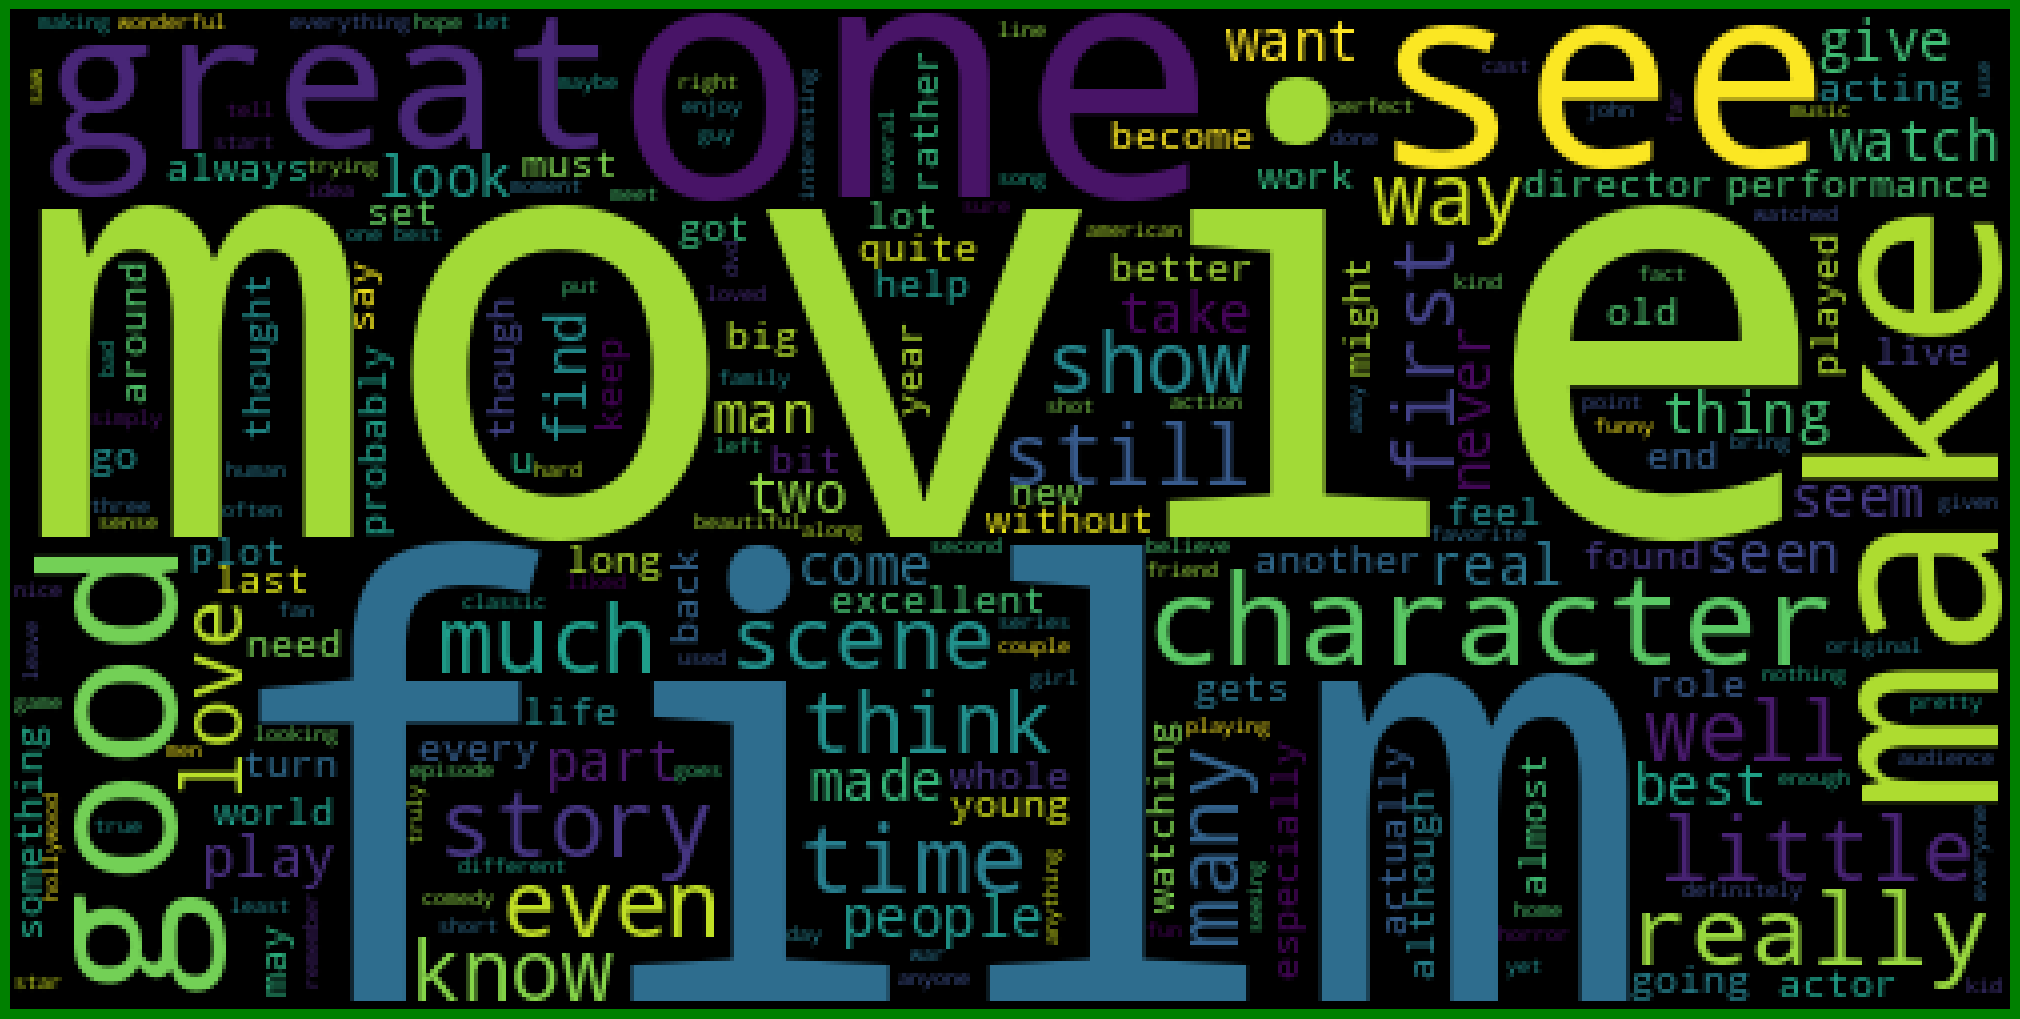

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
positive_wordcloud = WordCloud(width=500, height=250).generate(str(' '.join(positive_words)))
plt.figure(figsize=(20,10), facecolor='g')
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [13]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [14]:
data['review'][:1000]=data['review'][:1000].apply(textpreprocess)

In [15]:
data['review'][:1000]=data['review'][:1000].agg(lambda x:' '.join(map(str,x)))

In [16]:
data.head()

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [17]:
data.head(1)

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive


In [18]:
positive_words[:10]

['one',
 'reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'exactly',
 'happened',
 'first',
 'thing']

In [19]:
print(pd.Series(positive_words).value_counts().head(5))

film     1109
movie    1084
one       892
like      617
see       451
dtype: int64


In [20]:
negative_words=textpreprocess(negative_review)

In [21]:
negative_words[:100]

['basically',
 'family',
 'little',
 'boy',
 'thinks',
 'zombie',
 'closet',
 'parents',
 'fighting',
 'movie',
 'slower',
 'soap',
 'jake',
 'decides',
 'become',
 'rambo',
 'kill',
 'first',
 'going',
 'make',
 'film',
 'must',
 'decide',
 'thriller',
 'drama',
 'movie',
 'parents',
 'divorcing',
 'arguing',
 'like',
 'real',
 'jake',
 'closet',
 'totally',
 'ruins',
 'expected',
 'see',
 'boogeyman',
 'similar',
 'instead',
 'watched',
 'drama',
 'meaningless',
 'thriller',
 'well',
 'playing',
 'parents',
 'descent',
 'shots',
 'ignore',
 'show',
 'fresh',
 'innovative',
 'idea',
 'first',
 'first',
 'years',
 'things',
 'dropped',
 'show',
 'really',
 'funny',
 'continued',
 'decline',
 'complete',
 'waste',
 'time',
 'truly',
 'disgraceful',
 'far',
 'show',
 'writing',
 'painfully',
 'performances',
 'almost',
 'bad',
 'mildly',
 'entertaining',
 'respite',
 'show',
 'probably',
 'still',
 'find',
 'hard',
 'believe',
 'creator',
 'original',
 'cast',
 'also',
 'chose',
 'band',

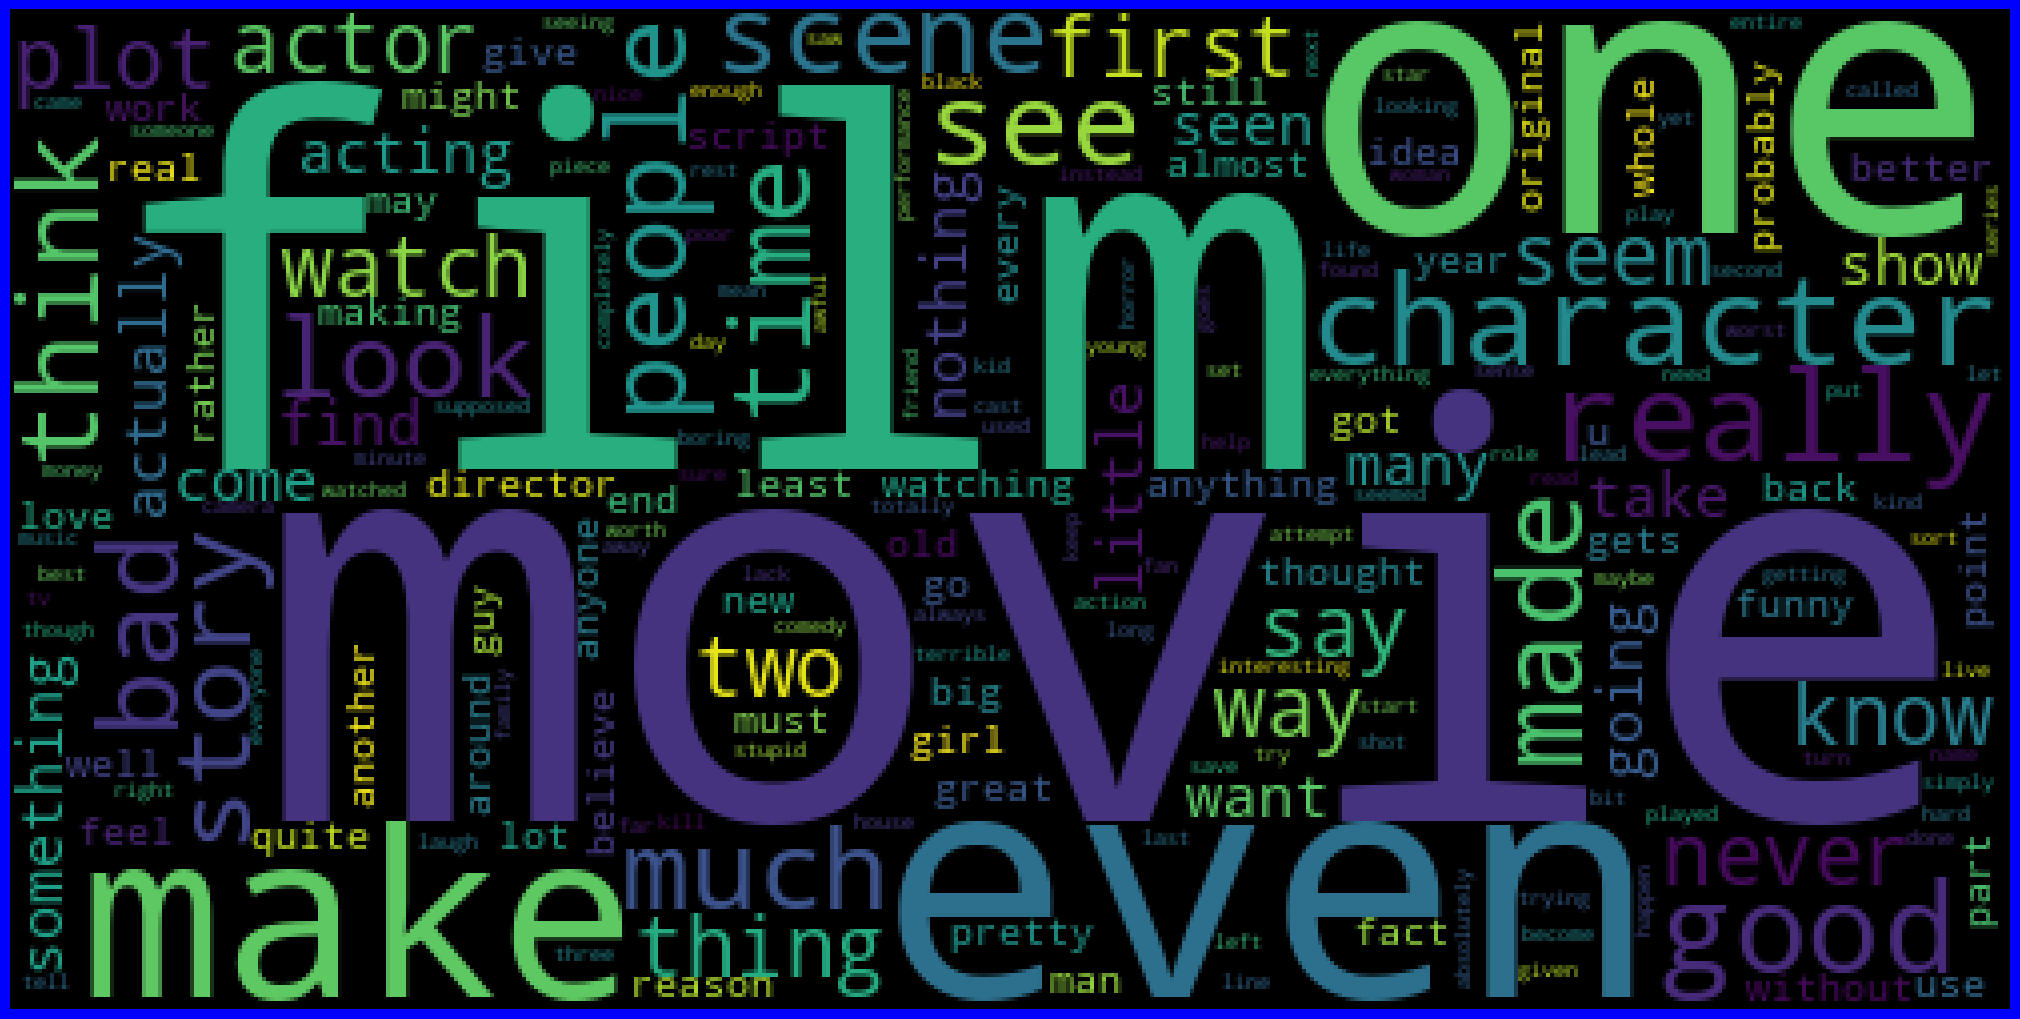

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
negative_wordcloud=WordCloud(width=500,height=250).generate(' '.join(negative_words))
plt.figure(figsize=(20,10),facecolor='b')
plt.axis('off')
plt.imshow(negative_wordcloud)
plt.tight_layout(pad=0)
plt.show()

In [23]:
print(pd.Series(negative_words).value_counts().head(5))

movie    1424
film      993
one       806
like      795
even      611
dtype: int64


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
bow_transformer=vectorizer.fit(data['review'])
# bow_transformer
print('20 Bag of words:\n')
print(vectorizer.get_feature_names_out()[1:10])
print('20 Vocabulary Words: ',len(vectorizer.vocabulary_))

20 Bag of words:

['000' '00000000000' '0000000000001' '00000001' '00001' '00015' '000dm'
 '000s' '001']
20 Vocabulary Words:  104883


In [25]:
print(vectorizer.vocabulary_)

{'one': 66011, 'reviewers': 77712, 'mentioned': 59172, 'watching': 101072, 'oz': 67409, 'episode': 30908, 'youll': 104077, 'hooked': 44064, 'right': 78121, 'exactly': 31794, 'happened': 41563, 'mebr': 58661, 'br': 12370, 'first': 34441, 'thing': 93054, 'struck': 89152, 'brutality': 13329, 'unflinching': 97391, 'scenes': 81021, 'violence': 99957, 'set': 82672, 'word': 103020, 'go': 38827, 'trust': 95700, 'show': 83829, 'faint': 32774, 'hearted': 42312, 'timid': 93671, 'pulls': 73701, 'punches': 73749, 'regards': 76272, 'drugs': 28161, 'sex': 82772, 'hardcore': 41630, 'classic': 17998, 'use': 98609, 'wordbr': 103021, 'called': 14482, 'nickname': 64009, 'given': 38504, 'oswald': 66667, 'maximum': 58117, 'security': 81997, 'state': 88073, 'penitentary': 69048, 'focuses': 35186, 'mainly': 56519, 'emerald': 30023, 'city': 17836, 'experimental': 32206, 'section': 81976, 'prison': 72685, 'cells': 15990, 'glass': 38581, 'fronts': 36400, 'face': 32647, 'inwards': 47878, 'privacy': 72703, 'high':

In [26]:
data2=data['review'][3]
data2

'basically theres family little boy jake thinks theres zombie closet parents fighting timebr br movie slower soap opera suddenly jake decides become rambo kill zombiebr br ok first youre going make film must decide thriller drama drama movie watchable parents divorcing arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller spotsbr br well playing parents descent dialogs shots jake ignore'

In [27]:
bow=bow_transformer.transform([data2])
print(bow)

  (0, 5904)	1
  (0, 8701)	1
  (0, 9200)	1
  (0, 11820)	1
  (0, 12318)	1
  (0, 12370)	3
  (0, 18357)	2
  (0, 23769)	1
  (0, 23774)	1
  (0, 24926)	1
  (0, 25496)	1
  (0, 26890)	1
  (0, 27825)	3
  (0, 32161)	1
  (0, 32940)	1
  (0, 34050)	1
  (0, 34121)	2
  (0, 34441)	1
  (0, 38983)	1
  (0, 45448)	1
  (0, 47174)	1
  (0, 48558)	4
  (0, 51018)	1
  (0, 54108)	1
  (0, 54217)	1
  :	:
  (0, 65795)	1
  (0, 66189)	1
  (0, 68113)	3
  (0, 70776)	1
  (0, 74911)	1
  (0, 75472)	1
  (0, 79424)	1
  (0, 82036)	1
  (0, 83791)	1
  (0, 84397)	1
  (0, 85370)	1
  (0, 85937)	1
  (0, 87415)	1
  (0, 89717)	1
  (0, 92949)	2
  (0, 93078)	1
  (0, 93282)	2
  (0, 93619)	1
  (0, 94453)	1
  (0, 101055)	1
  (0, 101062)	1
  (0, 101484)	1
  (0, 104100)	1
  (0, 104673)	1
  (0, 104674)	1


In [28]:
bow.shape

(1, 104883)

In [29]:
print(bow_transformer.get_feature_names_out()[20])

00am


In [30]:
bow.nnz

55

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(bow)

In [32]:
tfidf=tfidf_transformer.transform(bow)
print(tfidf)

  (0, 104674)	0.0936585811581694
  (0, 104673)	0.0936585811581694
  (0, 104100)	0.0936585811581694
  (0, 101484)	0.0936585811581694
  (0, 101062)	0.0936585811581694
  (0, 101055)	0.0936585811581694
  (0, 94453)	0.0936585811581694
  (0, 93619)	0.0936585811581694
  (0, 93282)	0.1873171623163388
  (0, 93078)	0.0936585811581694
  (0, 92949)	0.1873171623163388
  (0, 89717)	0.0936585811581694
  (0, 87415)	0.0936585811581694
  (0, 85937)	0.0936585811581694
  (0, 85370)	0.0936585811581694
  (0, 84397)	0.0936585811581694
  (0, 83791)	0.0936585811581694
  (0, 82036)	0.0936585811581694
  (0, 79424)	0.0936585811581694
  (0, 75472)	0.0936585811581694
  (0, 74911)	0.0936585811581694
  (0, 70776)	0.0936585811581694
  (0, 68113)	0.2809757434745082
  (0, 66189)	0.0936585811581694
  (0, 65795)	0.0936585811581694
  :	:
  (0, 54217)	0.0936585811581694
  (0, 54108)	0.0936585811581694
  (0, 51018)	0.0936585811581694
  (0, 48558)	0.3746343246326776
  (0, 47174)	0.0936585811581694
  (0, 45448)	0.0936585811581

In [33]:
messages_bow=bow_transformer.transform(data['review'])
messages_bow

<50000x104883 sparse matrix of type '<class 'numpy.int64'>'
	with 6789465 stored elements in Compressed Sparse Row format>

In [34]:
data['review']

0        one reviewers mentioned watching oz episode yo...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [35]:
messages_tfidf=tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(50000, 104883)


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(encoding='latin1')
features=vec.fit_transform(data['review'])
print(features.shape)
print(len(vec.vocabulary_))

(50000, 104883)
104883


In [37]:
from sklearn.model_selection import train_test_split
rev_train,rev_test,sen_train,sen_test=train_test_split(messages_tfidf,data['sentiment'],test_size=0.2)

In [38]:
rev_train.shape


(40000, 104883)

In [39]:
sen_train.shape

(40000,)

In [40]:
rev_test.shape


(10000, 104883)

In [41]:
sen_test.shape

(10000,)

In [42]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
sentiment_model=clf.fit(rev_train,sen_train)
sentiment_model

MultinomialNB()

In [43]:
predict_train=sentiment_model.predict(rev_train)
predict_train

array(['positive', 'negative', 'negative', ..., 'positive', 'positive',
       'negative'], dtype='<U8')

In [44]:
print('predicted: ',sentiment_model.predict(tfidf)[0])
print('expected: ',data['sentiment'][5])

predicted:  negative
expected:  positive


In [45]:
label_predictions=sentiment_model.predict(rev_test)
print(label_predictions)

['positive' 'positive' 'negative' ... 'positive' 'negative' 'negative']


In [46]:
import sklearn.metrics
print('Accuracy of the model:{0:0.3f}'.format(sklearn.metrics.accuracy_score(sen_test,label_predictions)))

Accuracy of the model:0.846


In [47]:
sample_data=['One of the other reviewers has mentioned that ...']
sample_data_bow=bow_transformer.transform(sample_data)
sample_data_tfidf=tfidf_transformer.transform(sample_data_bow)
prediction=sentiment_model.predict(sample_data_tfidf)
print(prediction[0])


negative
